In [153]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#Load image names
#load images
#seperate images based on exposiure time
#calculate median images
#background subtraction
#thresholding

In [154]:
shutter_speeds = ["29991", "43322", "56653", "69999", "83330", "96661", "109991", "123322", "136653", "149999"]
image_paths = glob.glob('data/850nm/id1/*.png')

In [188]:
all_images = []
for shutter_speed in shutter_speeds:
    paths = [path for path in image_paths if shutter_speed in path]
    paths.sort()
    images = []
    for path in paths:
        gray = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)
        images.append(gray)
    all_images.append(images)
all_images = np.array(all_images)
all_images = all_images[:,:,:,180:1500]

In [191]:
median_images = []
for images in all_images:
    median = np.median(images, axis=0).astype('uint8')
    median_images.append(median)
median_images = np.array(median_images)

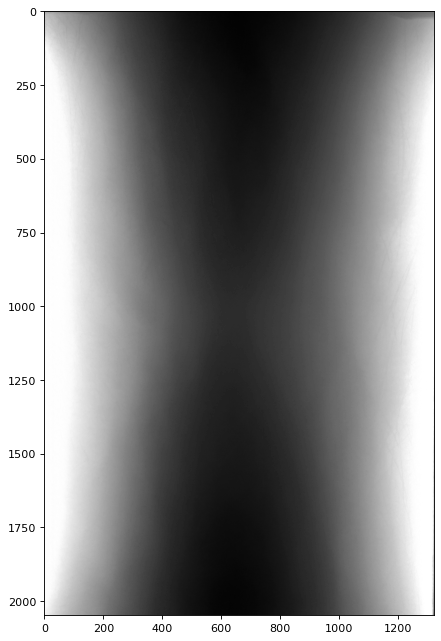

In [192]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(median_images[9], cmap='gray')

In [233]:
image = all_images[9][3].astype('int16')
meidan = median_images[9].astype('int16')
sub = (image-meidan)

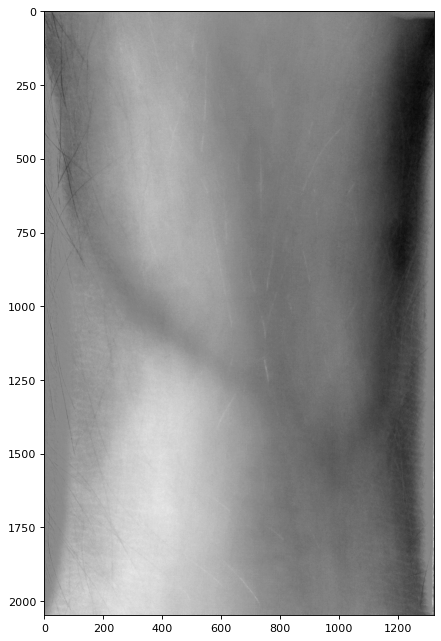

In [234]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(sub, cmap='gray')

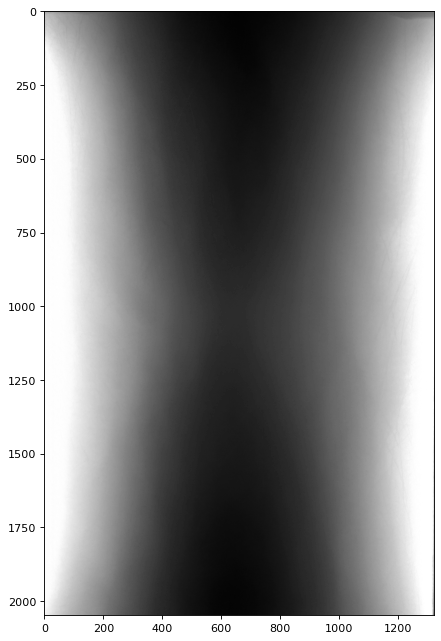

In [235]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(meidan, cmap='gray')

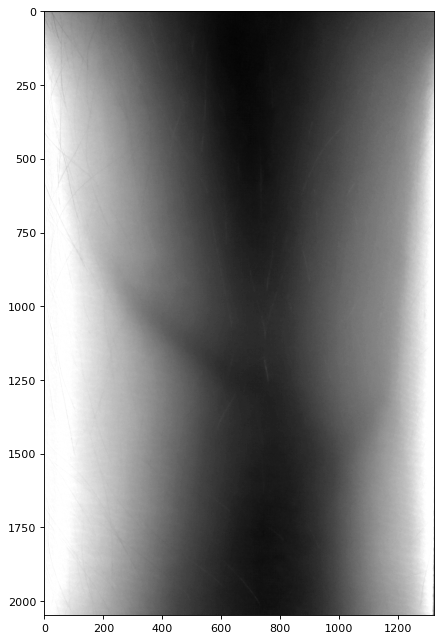

In [236]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(image, cmap='gray')

In [198]:
all_subtracted_images[7][4]

array([[ 23,  21,  21, ...,   0, 255,   1],
       [ 27,  26,  22, ...,   0,   0,   0],
       [ 30,  29,  32, ...,   4,   0,   0],
       ...,
       [250, 247, 249, ...,   0,   5,   6],
       [252, 253, 245, ...,   0,   6,   8],
       [  0, 249, 245, ..., 253,   7,   9]], dtype=uint8)